For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

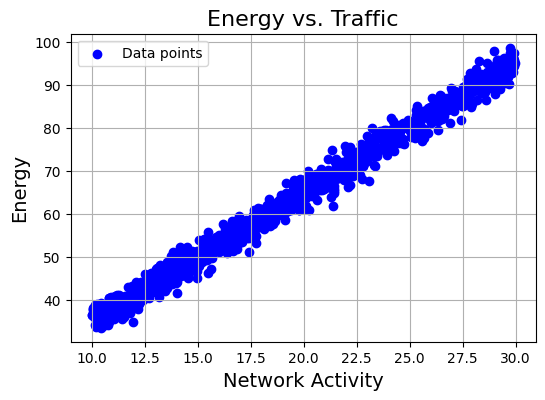

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'], epoch=50000, lr=1e-4)

lr.predict(data['Net_Activity'])

0      95.163990
1      59.877169
2      95.084862
3      33.992150
4      95.702171
         ...    
995    33.789294
996    46.998568
997    87.694150
998    65.056061
999    43.150821
Name: Net_Activity, Length: 1000, dtype: float64

#### Mission 1 Discussion

**Visualize the fitted curve. Derive the resulting Energy consumption formula:**

After performing the fit function, I get the following linear regression (energy consumption) formula

In [6]:
print("Final formula:", lr.get_formula(5))

# Estimate RMSE
y_pred = lr.predict(data['Net_Activity'])
print("RMSE:", lr.rmse(y_pred, data['Energy']))

Final formula: y = 3.11159x + 2.66284
RMSE: 2.083298799642465


We see that this linear regression fits the Data quite well

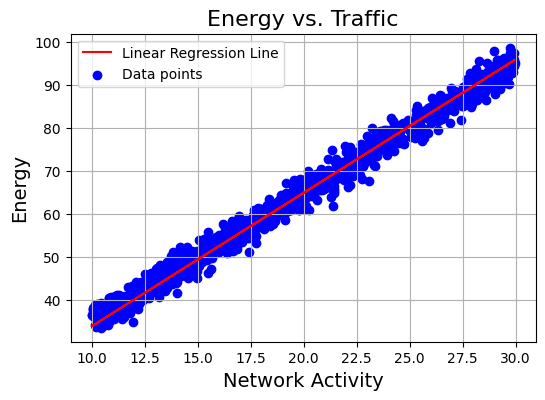

In [7]:
# Load data
plt.figure(figsize=(6, 4))
plt.plot(data['Net_Activity'], y_pred, color='red', label='Linear Regression Line')
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

**Analyze prediction error distribution. What is an unbiased estimator?**

We see we got the follwing error distribution

Mean Error: -0.17


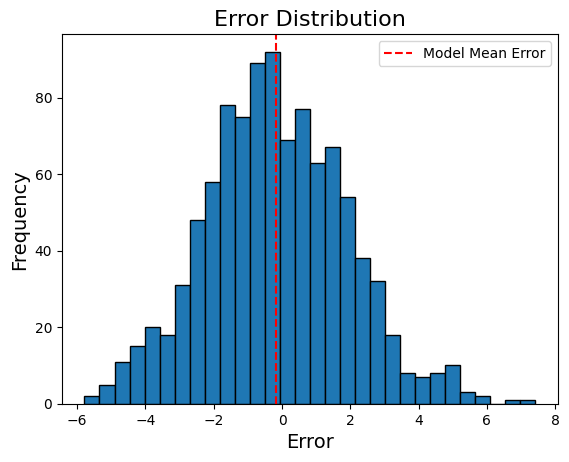

In [8]:
errors = y_pred - data['Energy']
error_mean = np.mean(errors)

print(f'Mean Error: {error_mean:.2f}')

plt.figure()
plt.axvline(x=error_mean, color='red', linestyle='--', label='Model Mean Error')
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Error Distribution', fontsize=16)
plt.legend()
plt.show()

An unbiased estimator is an estimator that has an average estimation equating the true value. We see that our models average error is very close to 0. We can therefore call it unbiased as it guesses almost exactly as much over as under during regression.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [9]:
from log_regression import LogRegression
import sklearn.tree as tree

In [10]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train_x = train.iloc[:, :-2]
test_x = test.iloc[:, :-2]

train_y = train.iloc[:, -2]
test_y = test.iloc[:, -2]

In [11]:
print(train_x, train_y)

           x0        x1
0    0.377044  0.587023
1   -1.222865  1.514124
2   -0.036282 -1.562136
3   -1.217459  0.151372
4    0.072188  0.503239
..        ...       ...
495 -0.796331  1.795741
496  0.279699 -0.572485
497  0.648313 -1.974123
498  0.672983 -0.449303
499  0.867427  0.253261

[500 rows x 2 columns] 0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    1.0
499    0.0
Name: y, Length: 500, dtype: float64


### Wee see that normal log regression works quite poorly

Epoch 0: cost=0.6971
Epoch 1000: cost=0.6966
Epoch 2000: cost=0.6962
Epoch 3000: cost=0.6958
Epoch 4000: cost=0.6954
Epoch 5000: cost=0.6951
Epoch 6000: cost=0.6948
Epoch 7000: cost=0.6945
Epoch 8000: cost=0.6943
Epoch 9000: cost=0.6941


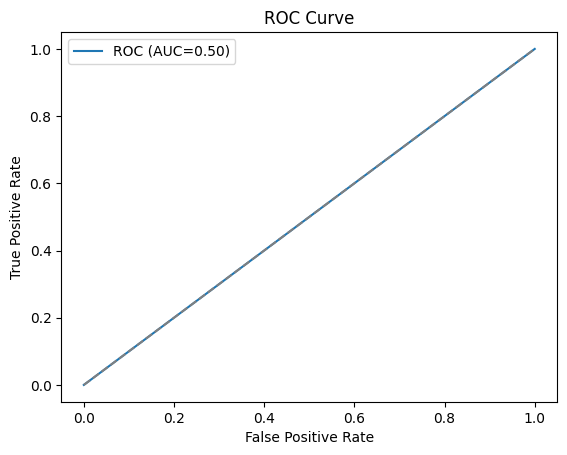

{'accuracy': 0.482, 'roc_auc': 0.5}

In [12]:
lg = LogRegression(degrees=0)
lg.fit(train_x, train_y, lr=1e-4, epoch=10000, verbose=True)

lg.measure_accuracy(test_x, test_y, tresh=0.5, plot_roc=True)

### But by implementing polynomials to allow non-linear seperation, we get WAY better results

Epoch 0: cost=0.7553
Epoch 50000: cost=0.5431
Epoch 100000: cost=0.5009
Epoch 150000: cost=0.4818
Epoch 200000: cost=0.4710
Epoch 250000: cost=0.4641
Epoch 300000: cost=0.4594
Epoch 350000: cost=0.4560
Epoch 400000: cost=0.4535
Epoch 450000: cost=0.4515


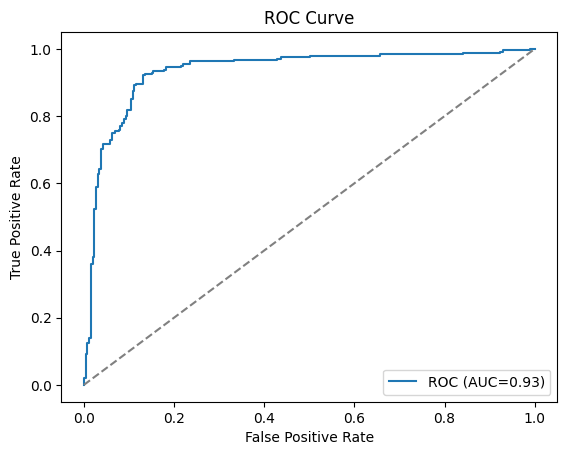

{'accuracy': 0.86, 'roc_auc': 0.9332895432480494}

In [13]:
lg = LogRegression(degrees=2)
lg.fit(train_x, train_y, lr=1e-4, epoch=500000, verbose=True)

lg.measure_accuracy(test_x, test_y, tresh=0.5, plot_roc=True)

### Lastly we try DecitionTreeClassifier

In [14]:
from sklearn.metrics import accuracy_score

decitionTree = tree.DecisionTreeClassifier()
decitionTree.fit(train_x, train_y)
accuracy_score(test_y, decitionTree.predict(test_x, True))

0.876

### Mission 2 Discussion

**Explain poor initial performance and your improvements**

My model originally had quite a bad performance, which I solved by adding polynomials so it can find non-linear seperations between the classes

**What is the model's inductive bias. Why is it important?**

The original model assumed the data could be explained with a linear relationship. This turned out not to work well for the dataset. The final model instead assumes the data follows a curved (quadratic) pattern, which better fitted the dataset

**Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?**

As shown above we very much can use the DecitionTreeClassifier, which gives similar results to our polynomial log regression algorithm.

**Plot the ROC curve**

Also shown above :D

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [15]:
# Modify the data to improve the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import ensemble

In [16]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Features = original continuous
x_train = train.drop(['target'], axis=1)
x_test = test.drop(['target'], axis=1)

# Labels = binary even/odd values
y_train = train[['target']].to_numpy()
y_test = test[['target']].to_numpy()

print(x_train.head())

   data_stream_0  data_stream_1  data_stream_2  data_stream_3  data_stream_4  \
0       1.591652       0.022000       0.066204         -4.470      -0.590364   
1      -0.658723      -1.105319      -0.249185         -9.140      -1.170606   
2       1.947652       0.452603      -0.050377         -1.936      -0.482726   
3       1.268409       0.858887       1.085982          0.044      -0.117343   
4      -1.040814       0.391381      -1.722088         -4.336       0.613355   

   data_stream_5  data_stream_6  data_stream_7  data_stream_8  data_stream_9  \
0       0.916947       0.091906       0.799122       0.169556       0.491818   
1      -1.195158      -0.247944      -0.091012       0.187395       0.180210   
2      -0.437251       2.435959      -0.197507      -1.834104      -0.982665   
3       0.350743       0.891113       0.612502       1.572513       1.759443   
4       0.721647      -1.406076       0.583793      -0.380348      -0.731454   

   data_stream_10  
0       -0.434949 

We see that data_stream_3 is different from the rest. We'll try to turn it into binary and see if we get any promising results

In [17]:
x_train_3_binary = (x_train['data_stream_3'] * 1000 ) % 2
x_test_3_binary  = (x_test['data_stream_3'] * 1000 ) % 2

# Head only yielded 0's so tail better presents both options
print(x_train_3_binary.tail())

7995    0.0
7996    1.0
7997    1.0
7998    1.0
7999    1.0
Name: data_stream_3, dtype: float64


We try to train a decition tree with this updated data

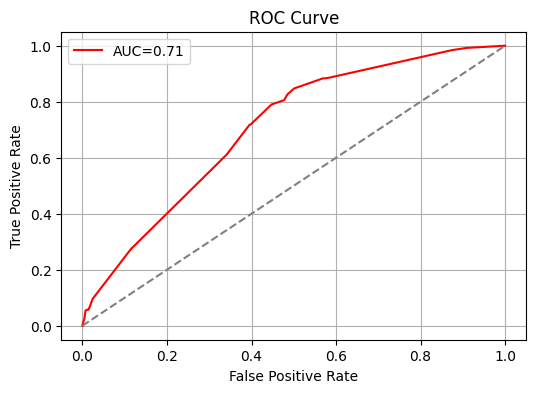

In [18]:
# Train a decision tree
dt = DecisionTreeClassifier(random_state=69, max_depth=5, criterion='gini', splitter='best')

x_train = np.concatenate((x_train, x_train_3_binary.values.reshape(-1,1)), axis=1)
x_test = np.concatenate((x_test, x_test_3_binary.values.reshape(-1,1)), axis=1)

# Fit the model
dt.fit(x_train, y_train)

# Predict
pred = dt.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and score
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

# Plot ROC Graph
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, c='red', label=f"AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.grid(True)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

c:\Users\chris\Desktop\NTNU Ting\9. Semester\TDT4172-Introduction-to-Machine-Learning\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


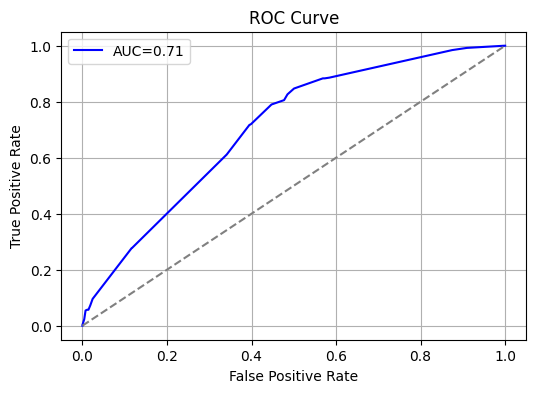

In [19]:
decisionForest = ensemble.RandomForestClassifier(random_state=69, n_estimators=100)

# Train the model
decisionForest.fit(x_train, y_train)

# Predict hard labels
pred_y = decisionForest.predict(x_test)
acc = accuracy_score(y_test, pred_y)

pred_probs = decisionForest.predict_proba(x_test)[:, 1]

# Calculate the ROC curve and score
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

# Plot ROC Graph
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, c='blue', label=f"AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.grid(True)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Mission 3 Discussion 

**Explain your threshold-breaking strategy. Did you change the default hyperparameters?**

To reach a ROC AUC of at least 0.72, the feature 'data_stream_3' was extracted from both the training and test datasets. At first, this feature was badly correlated with the target, and trough inspection I found it was different than the other values, only having a couple digits (where the others were way longer). By transforming it to binary (as reccomended by the assignment text) and tweaking the model parameters. I found the best results with the best splitter, gini criterion and a max depth of 6

**Justify ROC AUC usage. Plot and interpret ROC.**

Using the ROC curve is very nice as we can see how the good the model is very nicely visualizes how good our classefier is over the dataset. It can also be simply compared to the linear x=y line which equates to a totally random model. The graphs are shown above :D


**Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.**

As shown over, I tested using the Random Forest Classifier. It had similar results to my model

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [20]:
from sklearn.metrics import mean_squared_log_error
from energy_regression import EnsembleRegressor
import xgboost as xgb
from itertools import product
from feature_selector import FeatureSelector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
def compare_training_test(train, test):
    df_means = pd.DataFrame({
        "Train": round(train.mean(), 2),
        "Test": round(test.mean(), 2),
    })

    df_means["Diff"] = round(df_means["Train"] - df_means["Test"], 2)
    df_means["Diff (%)"] = ((df_means["Train"] - df_means["Test"]) / df_means["Train"] * 100).round(2)

    return df_means

In [22]:
def plot_all_datasets(train_df: pd.DataFrame, test_df: pd.DataFrame, n_cols = 3):
    n_features = train_df.shape[1]
    n_rows = -(-n_features // n_cols)  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(train_df.columns):
        axes[i].hist(train_df[col], bins=20, alpha=0.6, label="Train", color="steelblue", edgecolor="black")
        axes[i].hist(test_df[col], bins=20, alpha=0.6, label="Test", color="orange", edgecolor="black")
        axes[i].set_title(col)
        axes[i].set_ylabel("Frequency")
        axes[i].set_xlabel("Value")
        axes[i].legend()


In [23]:
print(train.head())

   data_stream_0  data_stream_1  data_stream_2  data_stream_3  data_stream_4  \
0       1.591652       0.022000       0.066204         -4.470      -0.590364   
1      -0.658723      -1.105319      -0.249185         -9.140      -1.170606   
2       1.947652       0.452603      -0.050377         -1.936      -0.482726   
3       1.268409       0.858887       1.085982          0.044      -0.117343   
4      -1.040814       0.391381      -1.722088         -4.336       0.613355   

   data_stream_5  data_stream_6  data_stream_7  data_stream_8  data_stream_9  \
0       0.916947       0.091906       0.799122       0.169556       0.491818   
1      -1.195158      -0.247944      -0.091012       0.187395       0.180210   
2      -0.437251       2.435959      -0.197507      -1.834104      -0.982665   
3       0.350743       0.891113       0.612502       1.572513       1.759443   
4       0.721647      -1.406076       0.583793      -0.380348      -0.731454   

   data_stream_10  target  
0       -0

In [24]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

print(compare_training_test(train, test))


                                 Train         Test         Diff      Diff (%)
ownership_type                    1.88         1.81         0.07  3.720000e+00
nexus_rating               23556173.47        75.14  23556098.33  1.000000e+02
energy_footprint                 74.45        12.87        61.58  8.271000e+01
core_reactor_size                12.55        39.50       -26.95 -2.147400e+02
harvesting_space                 38.74         9.18        29.56  7.630000e+01
vertical_alignment                8.97         2.20         6.77  7.547000e+01
power_chambers                    2.19         1.04         1.15  5.251000e+01
energy_flow_design                1.04         3.73        -2.69 -2.586500e+02
upper_collector_height            3.27         0.78         2.49  7.615000e+01
shared_conversion_units           0.74         0.61         0.13  1.757000e+01
isolated_conversion_units         0.66         0.81        -0.15 -2.273000e+01
internal_collectors               0.80         0.44 

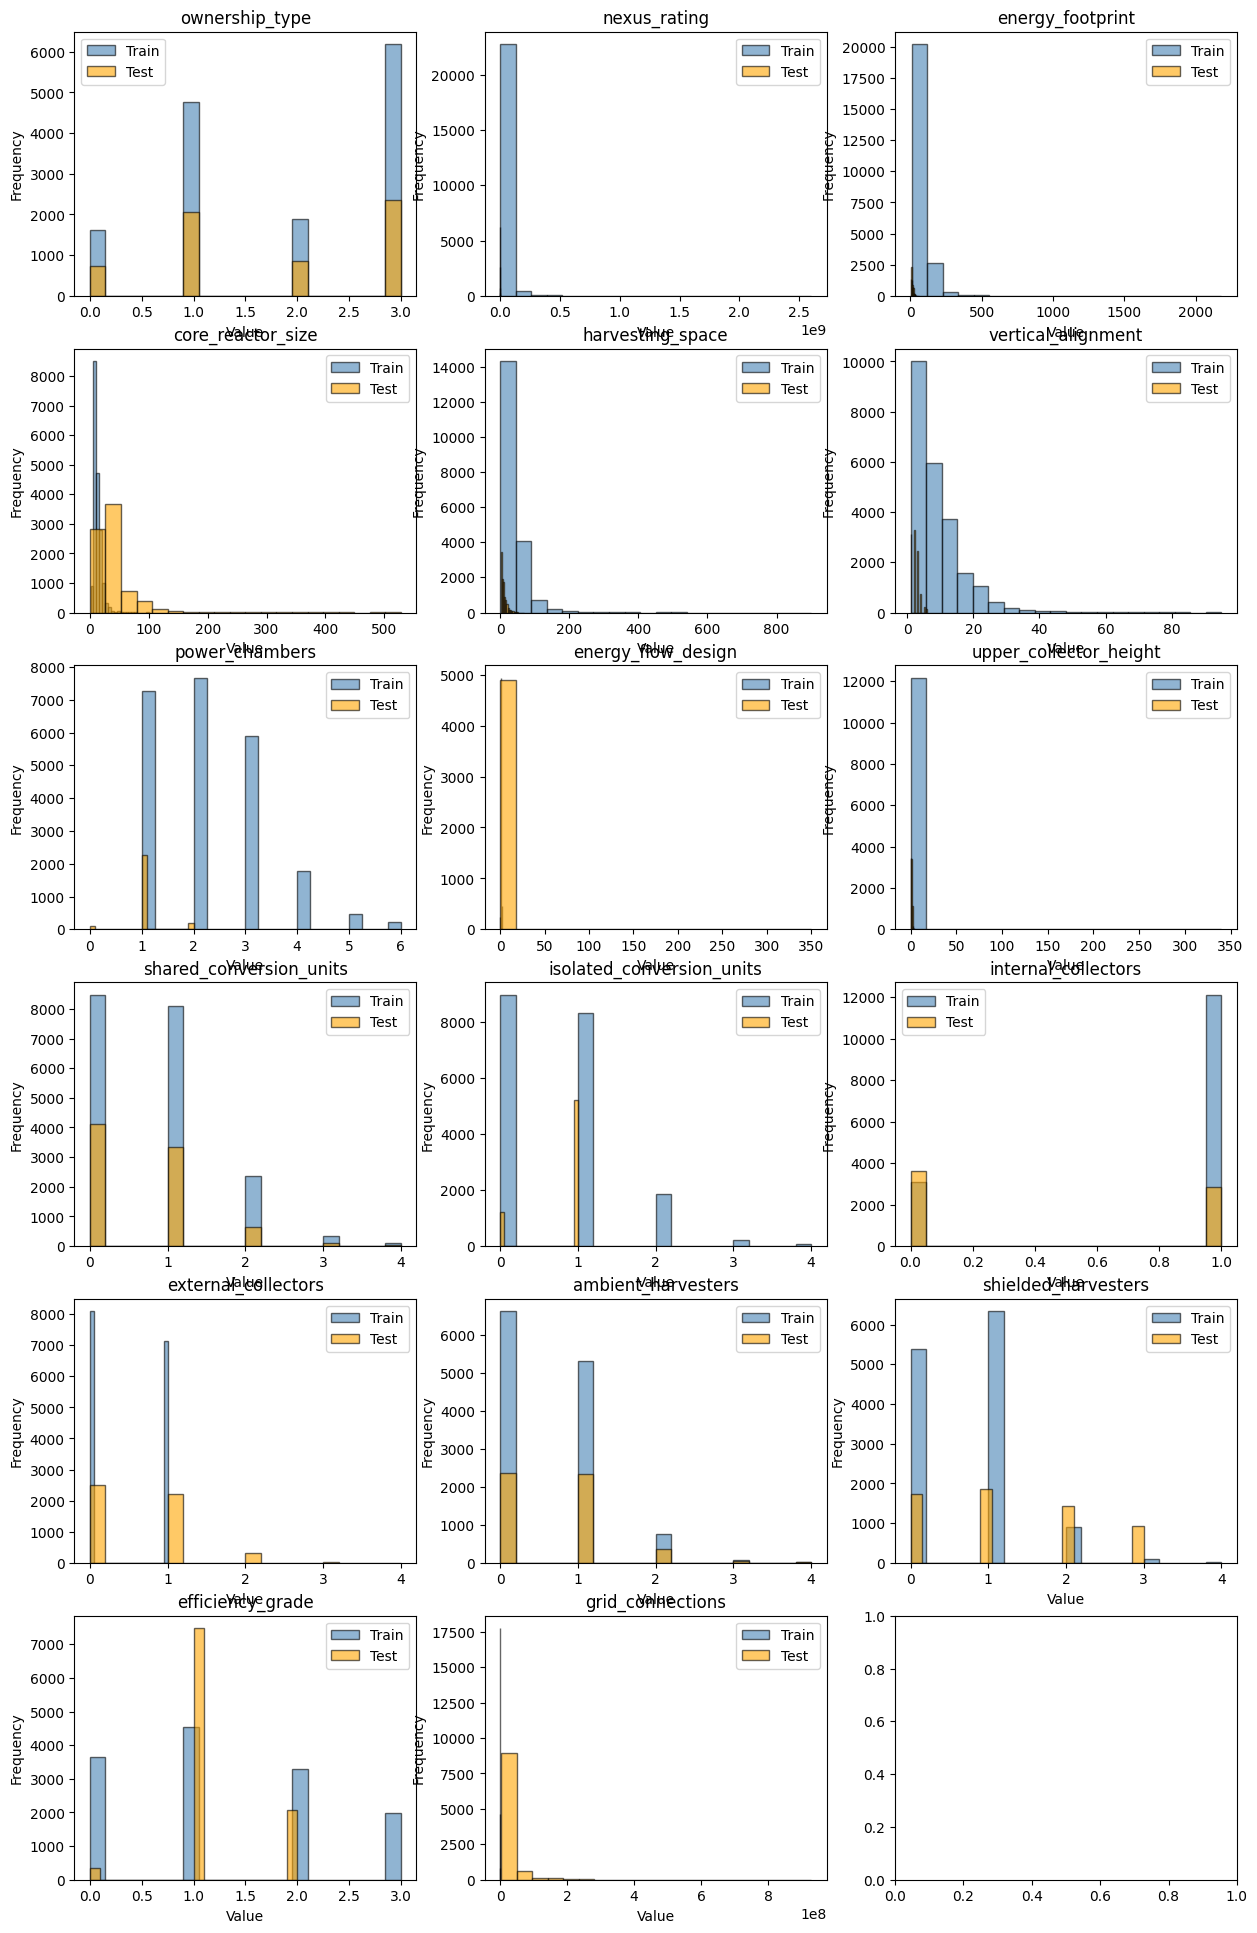

In [25]:
plot_all_datasets(train, test)

### Data Preprocessing

We see that the test dataset has replaced some features for others. To correct this, we have to replace some columns with others. I believe that all columns have been shifted one up, with the exception of grid_connections and ownership_type. ownership_type sould remain the same, whereas grid_connections should replace the vacant nexus_rating

In [26]:
# Extract the nexus_rating column
nexus_rating = train['nexus_rating']

# Extract the ownership_type column
ownership_type_temp = train['ownership_type'] 

# Drop the ownership_type column
train = train.drop(['ownership_type'], axis=1)

# Shift the columns to the right
train = train.shift(periods=-1, axis=1)

train['grid_connections'] = nexus_rating

# Adds the ownership type back
train.insert(0, 'ownership_type', ownership_type_temp)

In [27]:
print(compare_training_test(train, test))

                                 Train         Test       Diff  Diff (%)
ownership_type                    1.88         1.81       0.07      3.72
nexus_rating                     74.45        75.14      -0.69     -0.93
energy_footprint                 12.55        12.87      -0.32     -2.55
core_reactor_size                38.74        39.50      -0.76     -1.96
harvesting_space                  8.97         9.18      -0.21     -2.34
vertical_alignment                2.19         2.20      -0.01     -0.46
power_chambers                    1.04         1.04       0.00      0.00
energy_flow_design                3.27         3.73      -0.46    -14.07
upper_collector_height            0.74         0.78      -0.04     -5.41
shared_conversion_units           0.66         0.61       0.05      7.58
isolated_conversion_units         0.80         0.81      -0.01     -1.25
internal_collectors               0.47         0.44       0.03      6.38
external_collectors               0.56         0.58

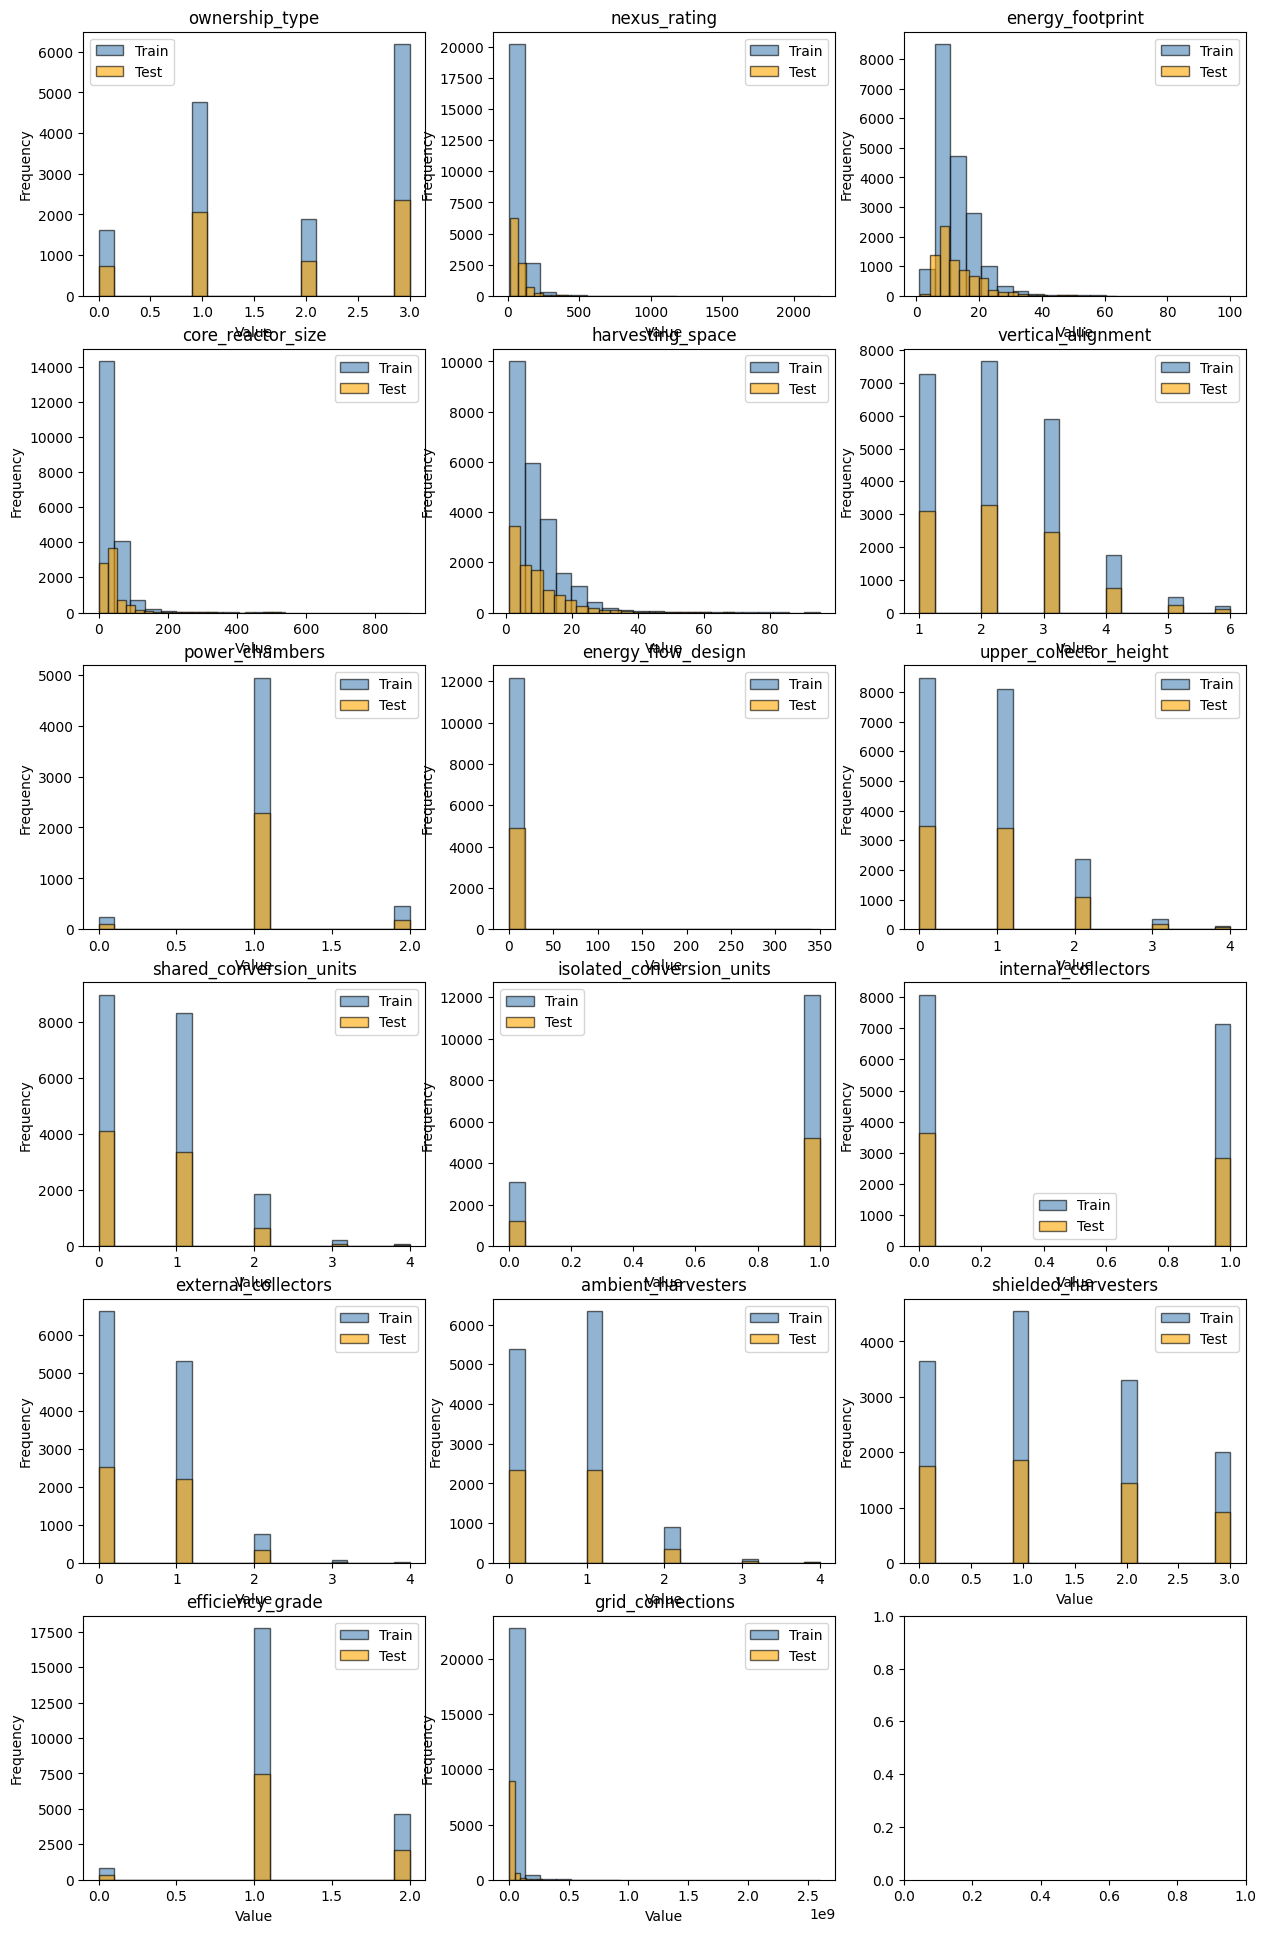

In [28]:
plot_all_datasets(train, test)

With this, we have much more reasonable values. Still, we need to remove the NaN values, which we do by replacing them with the mean

In [29]:
print(train.isna().sum())

ownership_type                8830
nexus_rating                     0
energy_footprint              4721
core_reactor_size             3882
harvesting_space                 0
vertical_alignment               0
power_chambers               17642
energy_flow_design           11093
upper_collector_height        3872
shared_conversion_units       3872
isolated_conversion_units     8072
internal_collectors           8072
external_collectors          10520
ambient_harvesters           10520
shielded_harvesters           9810
efficiency_grade                80
grid_connections                 0
dtype: int64


In [30]:
# Transform the data
def transform_data(funcTransform, dataframe):
    return pd.DataFrame(funcTransform(dataframe),columns = dataframe.columns)


y_train = train['nexus_rating']
y_test = test['nexus_rating']

x_train = train.drop(['nexus_rating'], axis=1)
x_test = test.drop(['nexus_rating'], axis=1)

# Fit the imputer on the training data and transform the training and testing data
imputer = KNNImputer(n_neighbors=5, weights="uniform")

x_train = transform_data(lambda x: imputer.fit_transform(x), x_train)
x_test = transform_data(lambda x: imputer.transform(x), x_test)

In [31]:
print(x_train.isna().sum())

ownership_type               0
energy_footprint             0
core_reactor_size            0
harvesting_space             0
vertical_alignment           0
power_chambers               0
energy_flow_design           0
upper_collector_height       0
shared_conversion_units      0
isolated_conversion_units    0
internal_collectors          0
external_collectors          0
ambient_harvesters           0
shielded_harvesters          0
efficiency_grade             0
grid_connections             0
dtype: int64


In [32]:
x_test.head()

,ownership_type,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,2.0,16.50,48.36,2.0,1.0,1.2,3.100,0.8,0.6,1.0,0.0,1.0,0.0,0.0,1.0,34000000.0
1,0.6,4.00,50.00,4.0,1.0,1.2,3.000,0.0,1.0,1.0,0.0,0.8,0.2,3.0,1.0,8700000.0
2,3.0,19.60,11.20,10.0,1.0,0.8,2.650,1.0,0.0,1.0,0.0,0.6,0.6,1.2,1.0,6177920.0
3,0.6,8.06,29.48,5.0,2.0,1.0,2.666,1.0,0.0,0.0,1.0,0.6,0.4,0.0,1.0,8900000.0
4,1.2,9.00,17.00,14.0,1.0,1.2,2.750,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5550000.0


In [33]:
# Fit the scaler on the training data and transform the training and testing data
scaler = MinMaxScaler()

x_train = transform_data(lambda x: scaler.fit_transform(x), x_train)
x_test = transform_data(lambda x: scaler.transform(x), x_test)

In [34]:
x_test.head()

,ownership_type,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
0,0.666667,0.156566,0.053733,0.010638,0.0,0.6,0.009118,0.20,0.15,1.0,0.0,0.25,0.00,0.000000,0.5,0.012735
1,0.200000,0.030303,0.055556,0.031915,0.0,0.6,0.008824,0.00,0.25,1.0,0.0,0.20,0.05,1.000000,0.5,0.003001
2,1.000000,0.187879,0.012444,0.095745,0.0,0.4,0.007794,0.25,0.00,1.0,0.0,0.15,0.15,0.400000,0.5,0.002031
3,0.200000,0.071313,0.032756,0.042553,0.2,0.5,0.007841,0.25,0.00,0.0,1.0,0.15,0.10,0.000000,0.5,0.003078
4,0.400000,0.080808,0.018889,0.138298,0.0,0.6,0.008088,0.25,0.00,1.0,0.0,0.00,0.25,0.333333,0.5,0.001789


### Feature extraction

In [35]:
from sklearn.metrics import mean_squared_log_error


def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [36]:
feature_selector = FeatureSelector()
best_combo = feature_selector.select_features(x_train, x_test, y_train, y_test, start_err=0.7, save_every=1000)

Resuming: best error so far = 0.3478178716955082


In [37]:
print(best_combo)

['ownership_type', 'energy_footprint', 'harvesting_space', 'vertical_alignment', 'power_chambers', 'shared_conversion_units', 'isolated_conversion_units', 'internal_collectors', 'external_collectors', 'shielded_harvesters', 'efficiency_grade']


### Train model

In [38]:
compare_training_test(x_train[best_combo], x_test[best_combo])

,Train,Test,Diff,Diff (%)
ownership_type,0.60,0.58,0.02,3.33
energy_footprint,0.12,0.12,0.00,0.00
harvesting_space,0.08,0.09,-0.01,-12.50
vertical_alignment,0.24,0.24,0.00,0.00
power_chambers,0.51,0.51,0.00,0.00
shared_conversion_units,0.17,0.16,0.01,5.88
isolated_conversion_units,0.80,0.80,0.00,0.00
internal_collectors,0.48,0.46,0.02,4.17
external_collectors,0.14,0.14,0.00,0.00
shielded_harvesters,0.41,0.41,0.00,0.00


In [39]:
def rmsle(y_true, y_pred):
    y_true = np.maximum(y_true, 0)
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [40]:
# Train a RandomForestRegressor on the entire dataset
forest = ensemble.RandomForestRegressor(n_estimators=100, random_state=69)
forest.fit(x_train, y_train)
y_forest = forest.predict(x_test)

# Train a RandomForestRegressor on the constricted dataset
forest = ensemble.RandomForestRegressor(n_estimators=100, random_state=69)
forest.fit(x_train[best_combo], y_train)
y_forest_best = forest.predict(x_test[best_combo])

# Print both errors
print("All Features:          ", rmsle(y_test, y_forest))
print("Estimated Best Fetures:", rmsle(y_test, y_forest_best))

All Features:           0.13663248218065974
Estimated Best Fetures: 0.21029805866339665


In [41]:
# Train a XGB Regressor on the entire dataset
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train, y_train)
y_xgb = xgb_regressor.predict(x_test)

# Train a XGB Regressor on the constricted dataset
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train[best_combo], y_train)
y_xgb_best = xgb_regressor.predict(x_test[best_combo])

# Print both versins
print("All Features:          ", rmsle(y_test, y_xgb))
print("Estimated Best Fetures:", rmsle(y_test, y_xgb_best))

All Features:           0.14190207608680708
Estimated Best Fetures: 0.21223325689664438


In [42]:
# Train a Gradient Boosting Regressor on the entire dataset
gbr_regressor = GradientBoostingRegressor(n_estimators=1000,
                                            random_state=69,
                                            learning_rate=1e-1,
                                            max_depth=2,
                                            loss='huber')
gbr_regressor.fit(x_train, y_train)
y_gbr = gbr_regressor.predict(x_test)

# Train a Gradient Boosting Regressor on the constricted dataset
gbr_regressor = GradientBoostingRegressor(n_estimators=1000,
                                            random_state=69,
                                            learning_rate=1e-1,
                                            max_depth=2,
                                            loss='huber')
gbr_regressor.fit(x_train[best_combo], y_train)
y_gbr_best = gbr_regressor.predict(x_test[best_combo])

# Print both versions
full_err = rmsle(y_test, y_gbr)
cons_err = rmsle(y_test, y_gbr_best)
print("All Features:          ", full_err)
print("Estimated Best Fetures:", cons_err)

All Features:           0.14189647640626699
Estimated Best Fetures: 0.20800257692468793


In [43]:
# Predict
print('RMSLE: ', rmsle(y_test, y_gbr))
print('Required RMSLE: ', 0.294)

RMSLE:  0.14189647640626699
Required RMSLE:  0.294


Even Though our models perform better than required, we try an ensemble of these on the training set to se if it gives better Results

In [44]:
min_rmsle = float('inf')
y_linreg = y_xgb
min_w_reg = min_w_forest = min_w_xgb = None

weights = np.linspace(0, 1, 20)

for w_reg, w_forest, w_xgb in product(weights, repeat=3):
    y_ensemble = (w_reg * y_linreg) + (w_forest * y_forest) + (w_xgb * y_xgb)
    error = rmsle(y_test, y_ensemble)
    
    if error < min_rmsle:
        min_rmsle = error
        min_w_reg, min_w_forest, min_w_xgb = w_reg, w_forest, w_xgb


y_ensemble = (min_w_reg * y_linreg) + (min_w_forest * y_forest) + (min_w_xgb + y_xgb)

print(f"-------------------------------------")
print(f"Best Results:")
print(f"Forest Weight: {min_w_forest}")
print(f"Reg Weight:    {min_w_reg}")
print(f"XGB Weight:    {min_w_xgb}")
print(f"-------------------------------------")
print(f"Total Error: {min_rmsle}")
print(f"-------------------------------------")

print(y_test.to_numpy()[:5])
print(np.round(y_ensemble[:5]))

-------------------------------------
Best Results:
Forest Weight: 0.6842105263157894
Reg Weight:    0.0
XGB Weight:    0.3157894736842105
-------------------------------------
Total Error: 0.13478273679622255
-------------------------------------
[71.4 54.  39.4 60.9 34. ]
[145. 108.  67.  81.  61.]


In [45]:
# Example rmsle check
print('RMSLE: ', min_rmsle)
print('Required RMSLE: ', 0.294)

RMSLE:  0.13478273679622255
Required RMSLE:  0.294


### Discussion
We see that our models perform better than the required treshold of 0.294 :D

**Explain your threshold-breaking strategy:**

To break the threshold I quickly found out the secret lies in formating the data correctly. Especially by reducing the features to values between 0 and 1, which assures that large valued featires doesn't dominate. Also, by trying to find the best features with XGB was a nice idea, it did not work in practice, with using all features generally yielding better results.

I developed a special algorithm called the endemble, which was based on the linear and log algorithms but as it was worse than the other three models, and I didn't want too many runs, I have just attatched the file and not implemented it here :P

**Plot and interpret feature importances:**

Se graph below :D

**Justify RMSLE usage. Why do we use this metric? Which loss function did you use?**

RMSLE is well-suited for problems where target values has a large range of posible values. In our case, the targets range from 0 up to 1e9, meaning that absolute errors can become extremely large. If we used a metric like RMSE, even reasonable predictions could be penalized too heavily simply because the scale of the target is large. RMSLE is a better reflection of how useful predictions are in practice for such wide-range data. 

For training the models I implemented the 'huber' loss for the GradientBoostingRegressor, as it balances squared and absolute error, making it robust to outliers. This resulted in better performance compared to other loss functions, lowering the RMSLE score. 

**Describe your ensembling techniques:**

For ensemble I used RandomForest as well as implementing a simple weighted average ensemble technique (which includes the Random forest). The ensemble gave the best results with a RMSLE value of 13.48. While I could have explored other solutions, I chose not to as my models gave more than good enough results.

**In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data:**

To address this, I would split the available labeled data into separate sets (e.g., training, validation, and test). The training set is used to fit the model, the validation set helps tune hyperparameters and prevent overfitting, and the final test set is held out to estimate performance on unseen data. Additionally, I could use techniques like cross-validation to get a more reliable estimate of generalization performance.

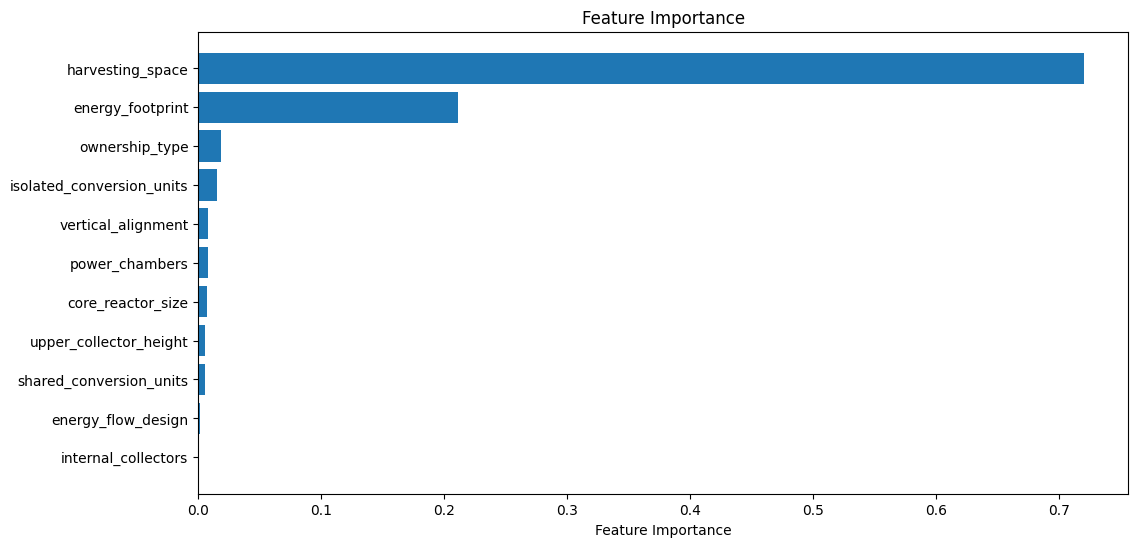

In [ ]:
# Luckily the GBR has a built in feature importance
feature_importance = gbr_regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()